# Importing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten, TimeDistributed
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preparation

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Final (1)/Wind Time Series Dataset(10min).csv')


In [ ]:
df.head()

,Time,WindSpeed,Power
0,2014-10-07 01:20:00,8.22,40.526173
1,2014-10-07 01:30:00,8.09,38.552540
2,2014-10-07 01:50:00,7.21,21.313683
3,2014-10-07 02:00:00,6.75,18.031418
4,2014-10-07 02:10:00,6.52,16.593281


- **The dataset** provides a time series of wind speed and the corresponding power generated at 10-minute intervals, beginning from October 7, 2014. This data is crucial for analyzing wind energy production and understanding the relationship between wind speed and power generation over time.

In [ ]:
df.describe()

,WindSpeed,Power
count,39195.000000,39195.000000
mean,6.863497,30.415774
std,2.065032,26.069511
min,0.090000,-0.007123
25%,5.370000,9.727654
50%,6.670000,22.314745
75%,8.070000,44.854827
max,19.790000,100.000000


- **The dataset** consists of 39,195 observations, with average wind speed and power values of 6.86 m/s and 30.42 units respectively, and it shows a significant range in both wind speed (0.09 to 19.79 m/s) and power generation (-0.007 to 100 units).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39195 entries, 0 to 39194
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       39195 non-null  object 
 1   WindSpeed  39195 non-null  float64
 2   Power      39195 non-null  float64
dtypes: float64(2), object(1)
memory usage: 918.8+ KB


In [ ]:
df.columns

Index(['Time', 'WindSpeed', 'Power'], dtype='object')

In [ ]:
print(df.isnull().sum())

Time         0
WindSpeed    0
Power        0
dtype: int64


In [ ]:
# Converting Date and Time Columns
df['Time'] = pd.to_datetime(df['Time'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39195 entries, 0 to 39194
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       39195 non-null  datetime64[ns]
 1   WindSpeed  39195 non-null  float64       
 2   Power      39195 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 918.8 KB


# EDA

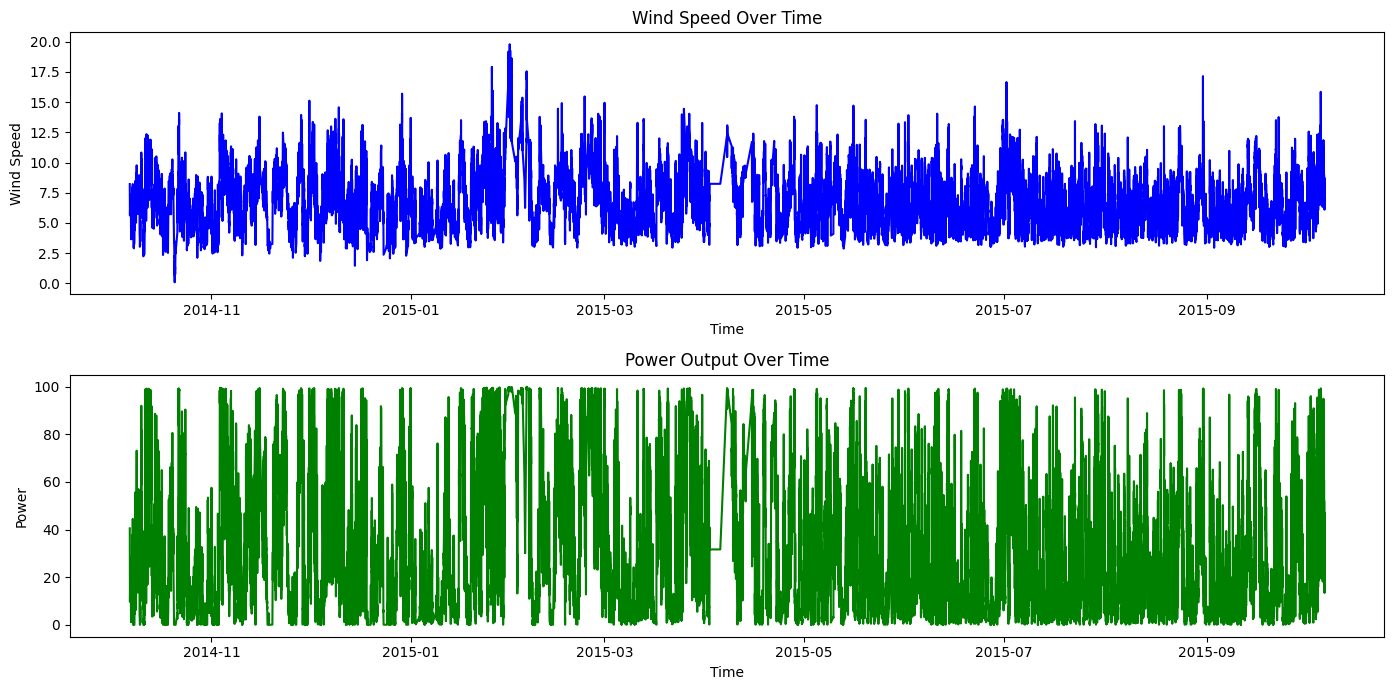

In [ ]:
# Set the Time column as the index for easier plotting
df.set_index('Time', inplace=True)

# Plot the WindSpeed and Power
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df['WindSpeed'], color='blue')
plt.title('Wind Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Wind Speed')

plt.subplot(2, 1, 2)
plt.plot(df['Power'], color='green')
plt.title('Power Output Over Time')
plt.xlabel('Time')
plt.ylabel('Power')
plt.tight_layout()
plt.show()


- **Wind speed and power output are connected:** Both graphs tend to move in the same direction. When wind speed is high, power output is also high, and vice versa.
- **Seasonal changes:** The graphs show a seasonal pattern. Both wind speed and power output seem to be higher in the winter and spring months (November to March) and lower in the summer and early fall.

- **More Power with Stronger Winds:** Wind turbines spin faster with stronger winds, generating more electricity. (Think faster pinwheels!)
- **Seasonal Wind:** This location might experience stronger winds during winter and spring, explaining the higher power output during those months.

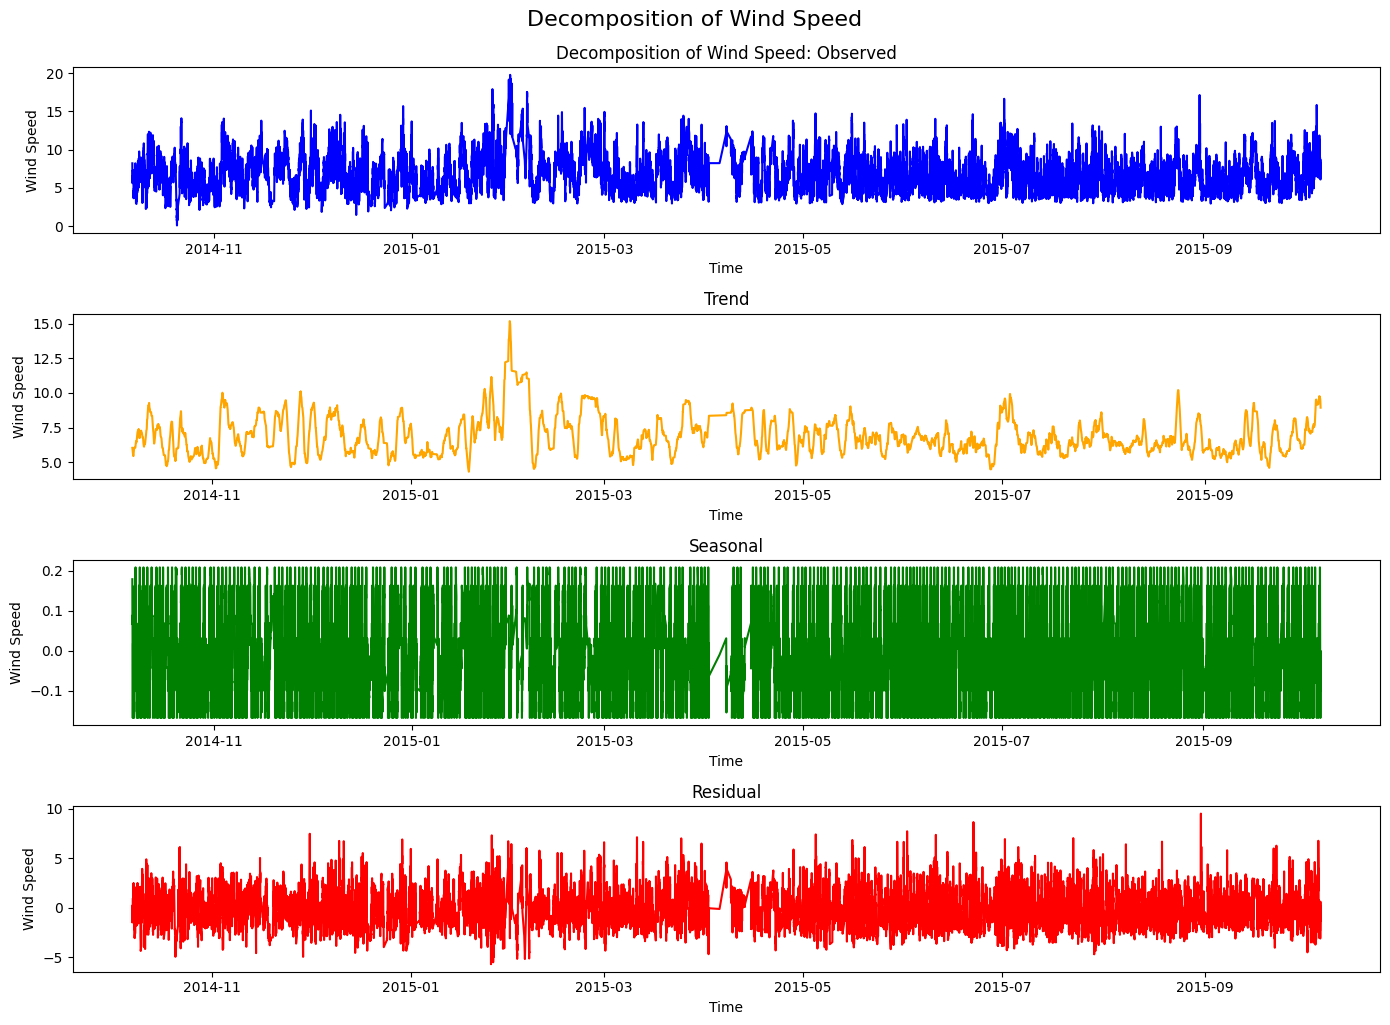

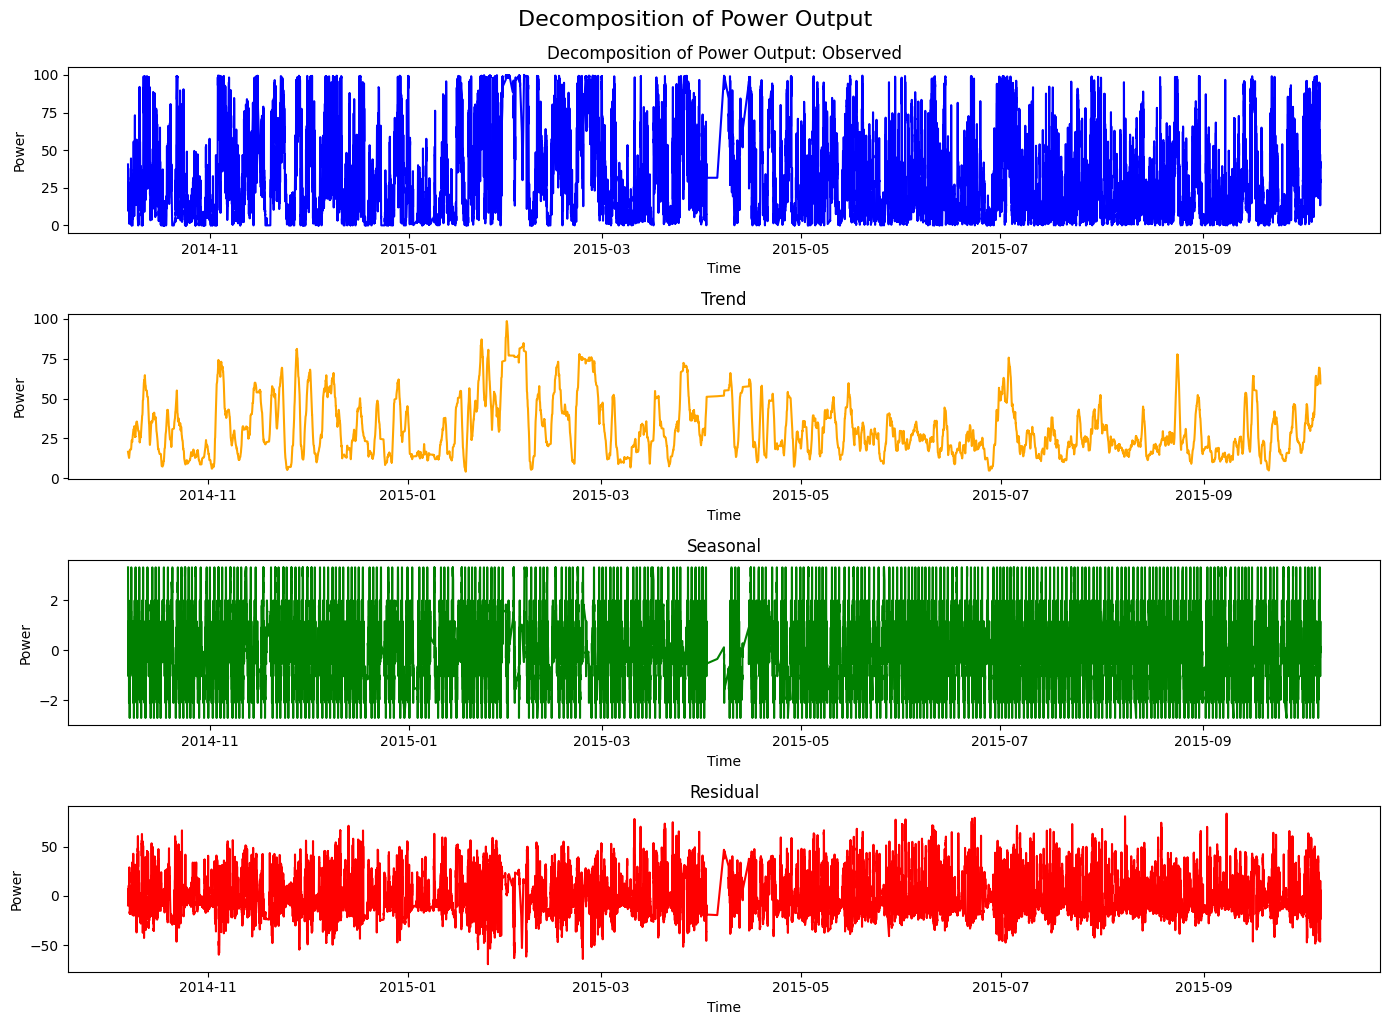

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series for WindSpeed
decomposition_wind = seasonal_decompose(df['WindSpeed'], model='additive', period=144)  # Assuming daily seasonality

# Plot the decomposition for WindSpeed
plt.figure(figsize=(14, 10))
plt.subplot(4, 1, 1)
plt.plot(decomposition_wind.observed, label='Observed', color='blue')
plt.title('Decomposition of Wind Speed: Observed')
plt.xlabel('Time')
plt.ylabel('Wind Speed')

plt.subplot(4, 1, 2)
plt.plot(decomposition_wind.trend, label='Trend', color='orange')
plt.title('Trend')
plt.xlabel('Time')
plt.ylabel('Wind Speed')

plt.subplot(4, 1, 3)
plt.plot(decomposition_wind.seasonal, label='Seasonal', color='green')
plt.title('Seasonal')
plt.xlabel('Time')
plt.ylabel('Wind Speed')

plt.subplot(4, 1, 4)
plt.plot(decomposition_wind.resid, label='Residual', color='red')
plt.title('Residual')
plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.tight_layout()
plt.suptitle('Decomposition of Wind Speed', fontsize=16, y=1.02)
plt.show()

# Decompose the time series for Power
decomposition_power = seasonal_decompose(df['Power'], model='additive', period=144)  # Assuming daily seasonality

# Plot the decomposition for Power
plt.figure(figsize=(14, 10))
plt.subplot(4, 1, 1)
plt.plot(decomposition_power.observed, label='Observed', color='blue')
plt.title('Decomposition of Power Output: Observed')
plt.xlabel('Time')
plt.ylabel('Power')

plt.subplot(4, 1, 2)
plt.plot(decomposition_power.trend, label='Trend', color='orange')
plt.title('Trend')
plt.xlabel('Time')
plt.ylabel('Power')

plt.subplot(4, 1, 3)
plt.plot(decomposition_power.seasonal, label='Seasonal', color='green')
plt.title('Seasonal')
plt.xlabel('Time')
plt.ylabel('Power')

plt.subplot(4, 1, 4)
plt.plot(decomposition_power.resid, label='Residual', color='red')
plt.title('Residual')
plt.xlabel('Time')
plt.ylabel('Power')
plt.tight_layout()
plt.suptitle('Decomposition of Power Output', fontsize=16, y=1.02)
plt.show()


**Decomposition wind speed**

- **Blue line (Trend):** This line shows the overall trend of the wind speed over time. It appears to be relatively flat, indicating that there is no significant upward or downward trend in wind speed over this period.
- **Green line (Seasonal):** This line shows the seasonal variations in wind speed. It seems to be higher in the winter and spring months (November to March) and lower in the summer and early fall.
- **Red line (Residual):** This line shows the random fluctuations in wind speed that are not explained by the trend or seasonal components. It appears to fluctuate around zero, indicating that there is no consistent pattern in the residuals.
**Decomposition of Power Output**

- **Trend (blue line):** This line shows the overall tendency of the power output over time. In this graph, the trend is slightly increasing, suggesting a gradual rise in power output over the represented period (November 2014 to September 2015).
- **Seasonal (green line):** This line captures the seasonal variations in power output. It appears there might be a seasonal pattern, with higher power output in the winter/spring (November to March) and lower power output in the summer and early fall.
- **Residual (red line):** This line shows the remaining fluctuations in power output that are not explained by the trend or seasonal components. It seems to fluctuate around zero, indicating there's no consistent pattern in these residuals.

<Figure size 1600x800 with 0 Axes>

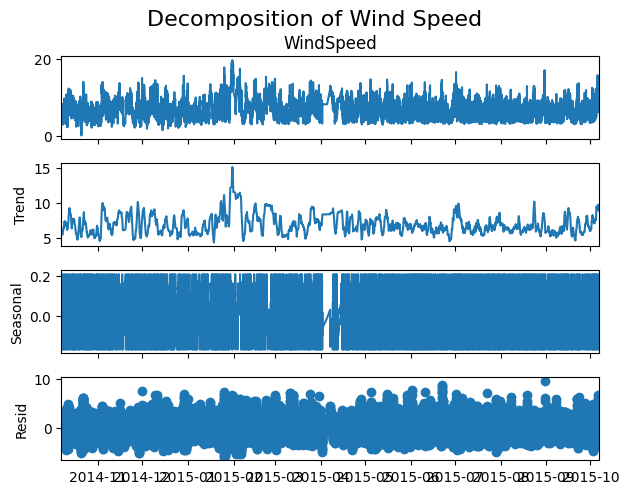

<Figure size 1600x800 with 0 Axes>

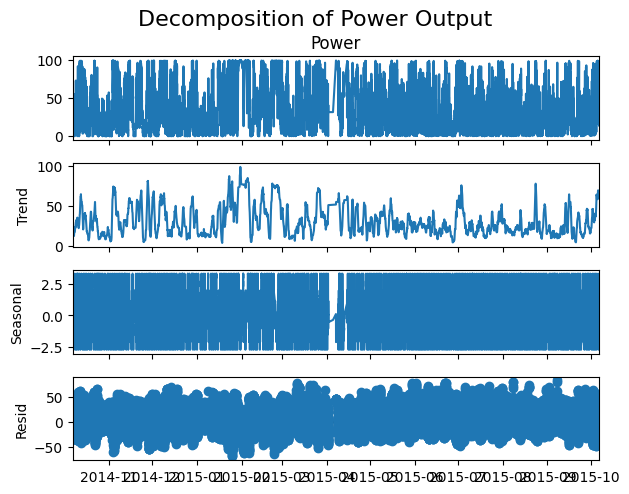

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series for WindSpeed
decomposition_wind = seasonal_decompose(df['WindSpeed'], model='additive', period=144)  # Assuming daily seasonality

# Plot the decomposition for WindSpeed
plt.figure(figsize=(16, 8))  # Adjust the figure size as per your preference
decomposition_wind.plot()
plt.suptitle('Decomposition of Wind Speed', fontsize=16, y=1.02)
plt.show()

# Decompose the time series for Power
decomposition_power = seasonal_decompose(df['Power'], model='additive', period=144)  # Assuming daily seasonality

# Plot the decomposition for Power
plt.figure(figsize=(16, 8))  # Adjust the figure size as per your preference
decomposition_power.plot()
plt.suptitle('Decomposition of Power Output', fontsize=16, y=1.02)
plt.show()


- **The trend** represents the overall long-term direction of the wind speed (not necessarily increasing or decreasing in this case).
- **The seasonal** component shows how wind speed varies throughout the year (higher in winter/spring, lower in summer/fall here).
- **The residual** component captures the unexplained fluctuations in wind speed not reflected in trend or seasonal variations.
- These components aren't necessarily additive. For example, the seasonal increase in wind speed during winter might not perfectly cancel out the seasonal decrease in summer, resulting in a net trend (positive or negative) over time.

<Figure size 1200x400 with 0 Axes>

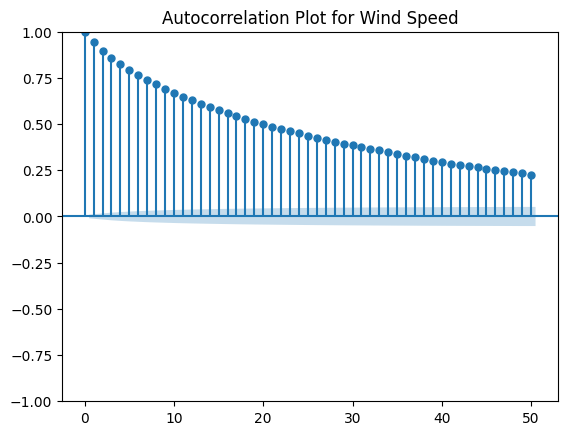

<Figure size 1200x400 with 0 Axes>

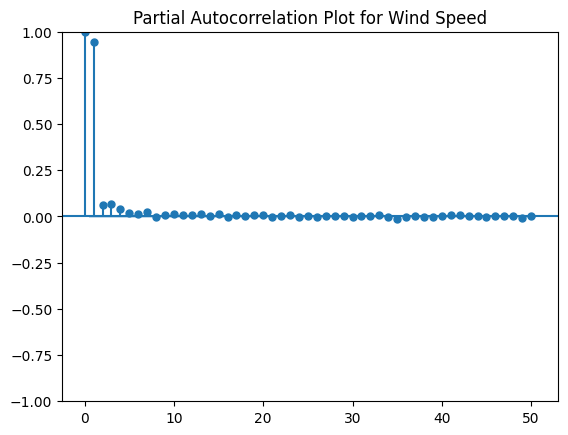

<Figure size 1200x400 with 0 Axes>

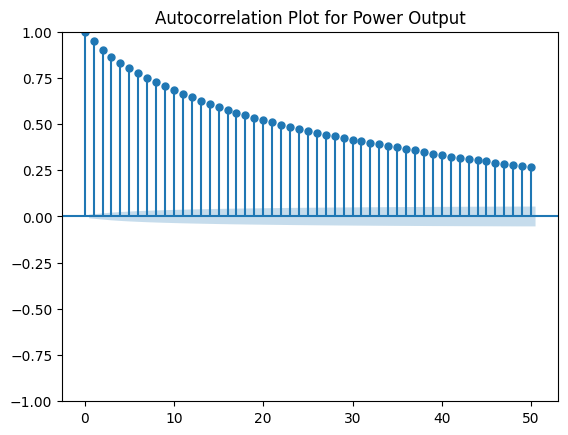

<Figure size 1200x400 with 0 Axes>

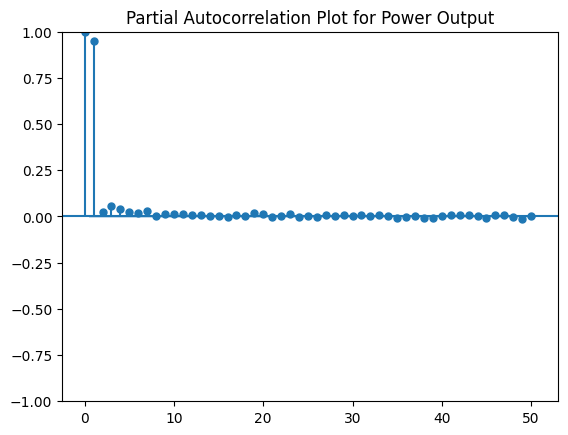

In [ ]:

# Autocorrelation plot for WindSpeed
plt.figure(figsize=(12, 4))
plot_acf(df['WindSpeed'], lags=50, alpha=0.05)
plt.title('Autocorrelation Plot for Wind Speed')
plt.show()

# Partial Autocorrelation plot for WindSpeed
plt.figure(figsize=(12, 4))
plot_pacf(df['WindSpeed'], lags=50, alpha=0.05)
plt.title('Partial Autocorrelation Plot for Wind Speed')
plt.show()

# Autocorrelation plot for Power
plt.figure(figsize=(12, 4))
plot_acf(df['Power'], lags=50, alpha=0.05)
plt.title('Autocorrelation Plot for Power Output')
plt.show()

# Partial Autocorrelation plot for Power
plt.figure(figsize=(12, 4))
plot_pacf(df['Power'], lags=50, alpha=0.05)
plt.title('Partial Autocorrelation Plot for Power Output')
plt.show()


# Data Preprocessing

In [ ]:
# Initialize the scaler
scaler = MinMaxScaler()
#  normalize the features.

In [ ]:
# Scale the features (WindSpeed and Power)
scaled_features = scaler.fit_transform(df[['WindSpeed', 'Power']])
# range between 0 and 1

In [ ]:
# Convert the scaled features back to a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=['WindSpeed', 'Power'], index=df.index)
# for easy tracking and analysis of data points during subsequent steps in the analysis pipeline.

In [ ]:
# Step 2: Train-Test Split
# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(df_scaled) * 0.8)
train_data, test_data = df_scaled[:train_size], df_scaled[train_size:]

In [ ]:
# Step 3: Sequence Generation (for LSTM)
# Define a function to generate sequences from the time series data
def generate_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Choose the number of time steps (input sequence length)
n_steps = 12

# Generate sequences for training and testing sets
X_train, y_train = generate_sequences(train_data.values, n_steps)
X_test, y_test = generate_sequences(test_data.values, n_steps)

# Print the shapes of the generated sequences
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (31344, 12, 2)
y_train shape: (31344, 2)
X_test shape: (7827, 12, 2)
y_test shape: (7827, 2)


**Summary**
- **Scaling:** Normalizes features to the range [0, 1].
- **Train-Test Split:** 80% training data, 20% testing data.
- **Sequence Generation:** Converts time series data into sequences suitable for LSTM, with each sequence containing 12 time steps and 2 features.

# Modeling

# LSTM

- **Model Description:** LSTM is a type of recurrent neural network (RNN) architecture designed to handle sequential data by maintaining context over long periods. It has internal mechanisms called gates to control the flow of information, making it capable of learning long-term dependencies.
- **Why Used:** LSTM is suitable for modeling time series data like wind speed and power output because it can capture temporal dependencies and patterns.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape),
        Dense(2)  # Output layer with 2 units for WindSpeed and Power
    ])
    return model

# Create the LSTM model
lstm_model = create_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse')

# Train the model
history_lstm = lstm_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1, verbose=1)

# Evaluate the model on the testing data
test_loss_lstm = lstm_model.evaluate(X_test, y_test)

# Print the test loss
print("Test Loss (LSTM):", test_loss_lstm)


Epoch 1/20
441/441 [==============================] - 7s 11ms/step - loss: 0.0095 - val_loss: 0.0050
Epoch 2/20
441/441 [==============================] - 6s 13ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 3/20
441/441 [==============================] - 4s 9ms/step - loss: 0.0043 - val_loss: 0.0045
Epoch 4/20
441/441 [==============================] - 4s 9ms/step - loss: 0.0043 - val_loss: 0.0047
Epoch 5/20
441/441 [==============================] - 5s 11ms/step - loss: 0.0042 - val_loss: 0.0045
Epoch 6/20
441/441 [==============================] - 5s 11ms/step - loss: 0.0042 - val_loss: 0.0045
Epoch 7/20
441/441 [==============================] - 4s 9ms/step - loss: 0.0041 - val_loss: 0.0045
Epoch 8/20
441/441 [==============================] - 4s 9ms/step - loss: 0.0041 - val_loss: 0.0045
Epoch 9/20
441/441 [==============================] - 6s 13ms/step - loss: 0.0041 - val_loss: 0.0045
Epoch 10/20
441/441 [==============================] - 4s 9ms/step - loss: 0.0041 - val_loss: 0

In [ ]:
# Evaluate the model on the testing data
y_pred_lstm = lstm_model.predict(X_test)

# Calculate evaluation metrics
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mape_lstm = np.mean(np.abs((y_test - y_pred_lstm) / y_test)) * 100

# Print the evaluation metrics
print("Evaluation Metrics (LSTM):")
print("MSE:", mse_lstm)
print("RMSE:", rmse_lstm)
print("MAE:", mae_lstm)
print("MAPE:", mape_lstm)

245/245 [==============================] - 1s 3ms/step
Evaluation Metrics (LSTM):
MSE: 0.0034417746697134243
RMSE: 0.05866664017747586
MAE: 0.03674222289154319
MAPE: 24.463238694396708


- **Result Explanation:** The LSTM model achieved a relatively low mean squared error (MSE) and root mean squared error (RMSE), indicating good predictive performance. The loss decreased gradually during training, suggesting the model effectively learned the patterns in the data. However, it's notable that the mean absolute percentage error (MAPE) is relatively high, indicating that the model's predictions have a considerable average percentage error.

# CNN-LSTM

- **Model Description:** CNN-LSTM combines convolutional layers with LSTM layers. Convolutional layers are used to extract spatial patterns from input sequences, and LSTM layers capture temporal dependencies. This architecture is effective for capturing both local and global dependencies in sequential data.
- **Why Used:** CNN-LSTM is suitable when the input sequences have spatial structures that can be learned by convolutional layers, followed by LSTM layers to capture temporal dependencies.

In [ ]:
# Define the CNN-LSTM model
def create_cnn_lstm_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        LSTM(64),
        Dense(2)  # Output layer with 2 units for WindSpeed and Power
    ])
    return model

# Create the CNN-LSTM model
cnn_lstm_model = create_cnn_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))

# Compile the model
cnn_lstm_model.compile(optimizer='adam', loss='mse')

# Train the model
history_cnn_lstm = cnn_lstm_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1, verbose=1)

# Evaluate the model on the testing data
test_loss_cnn_lstm = cnn_lstm_model.evaluate(X_test, y_test)

# Print the test loss
print("Test Loss (CNN-LSTM):", test_loss_cnn_lstm)


Epoch 1/20
441/441 [==============================] - 7s 10ms/step - loss: 0.0096 - val_loss: 0.0051
Epoch 2/20
441/441 [==============================] - 5s 10ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 3/20
441/441 [==============================] - 3s 7ms/step - loss: 0.0048 - val_loss: 0.0049
Epoch 4/20
441/441 [==============================] - 3s 7ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 5/20
441/441 [==============================] - 3s 7ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 6/20
441/441 [==============================] - 5s 11ms/step - loss: 0.0045 - val_loss: 0.0048
Epoch 7/20
441/441 [==============================] - 3s 7ms/step - loss: 0.0045 - val_loss: 0.0047
Epoch 8/20
441/441 [==============================] - 3s 7ms/step - loss: 0.0045 - val_loss: 0.0052
Epoch 9/20
441/441 [==============================] - 3s 7ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 10/20
441/441 [==============================] - 4s 10ms/step - loss: 0.0044 - val_loss: 0.

In [ ]:
# Evaluate the model on the testing data
y_pred_cnn_lstm = cnn_lstm_model.predict(X_test)

# Calculate evaluation metrics
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm = np.sqrt(mse_cnn_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mape_cnn_lstm = np.mean(np.abs((y_test - y_pred_cnn_lstm) / y_test)) * 100

# Print the evaluation metrics
print("Evaluation Metrics (CNN-LSTM):")
print("MSE:", mse_cnn_lstm)
print("RMSE:", rmse_cnn_lstm)
print("MAE:", mae_cnn_lstm)
print("MAPE:", mape_cnn_lstm)

245/245 [==============================] - 1s 2ms/step
Evaluation Metrics (CNN-LSTM):
MSE: 0.0035933736596502146
RMSE: 0.05994475506372692
MAE: 0.03872422067930171
MAPE: 41.84051732508177


- **Result Explanation:** The CNN-LSTM model achieved similar performance to LSTM, with slightly higher MSE and RMSE. Like the LSTM model, it shows a decreasing loss during training, indicating effective learning. However, the MAPE is also relatively high, suggesting that the model's predictions have significant errors on average.

# TCN

- **Model Description:** TCN is a modern architecture designed for sequence modeling, leveraging convolutional layers to capture both short and long-range dependencies. It uses dilated convolutions to expand the receptive field exponentially without increasing the number of parameters, allowing it to capture temporal patterns effectively.
- **Why Used:** TCN is suitable for capturing temporal dependencies in sequential data while being computationally efficient. It can model long-range dependencies more effectively than traditional CNNs while requiring fewer parameters than RNNs like LSTM.

In [ ]:
# Define the TCN model
def create_tcn_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(2)  # Output layer with 2 units for WindSpeed and Power
    ])
    return model

# Create the TCN model
tcn_model = create_tcn_model(input_shape=(X_train.shape[1], X_train.shape[2]))

# Compile the model
tcn_model.compile(optimizer='adam', loss='mse')

# Train the model
history_tcn = tcn_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1, verbose=1)

# Evaluate the model on the testing data
test_loss_tcn = tcn_model.evaluate(X_test, y_test)

# Print the test loss
print("Test Loss (TCN):", test_loss_tcn)


Epoch 1/20
441/441 [==============================] - 3s 4ms/step - loss: 0.0149 - val_loss: 0.0111
Epoch 2/20
441/441 [==============================] - 2s 4ms/step - loss: 0.0116 - val_loss: 0.0102
Epoch 3/20
441/441 [==============================] - 2s 5ms/step - loss: 0.0113 - val_loss: 0.0115
Epoch 4/20
441/441 [==============================] - 3s 6ms/step - loss: 0.0112 - val_loss: 0.0104
Epoch 5/20
441/441 [==============================] - 2s 4ms/step - loss: 0.0110 - val_loss: 0.0108
Epoch 6/20
441/441 [==============================] - 2s 4ms/step - loss: 0.0109 - val_loss: 0.0098
Epoch 7/20
441/441 [==============================] - 2s 4ms/step - loss: 0.0109 - val_loss: 0.0101
Epoch 8/20
441/441 [==============================] - 2s 4ms/step - loss: 0.0108 - val_loss: 0.0118
Epoch 9/20
441/441 [==============================] - 2s 4ms/step - loss: 0.0109 - val_loss: 0.0100
Epoch 10/20
441/441 [==============================] - 2s 4ms/step - loss: 0.0108 - val_loss: 0.0113

In [ ]:
# Evaluate the model on the testing data
y_pred_tcn = tcn_model.predict(X_test)

# Calculate evaluation metrics
mse_tcn = mean_squared_error(y_test, y_pred_tcn)
rmse_tcn = np.sqrt(mse_tcn)
mae_tcn = mean_absolute_error(y_test, y_pred_tcn)
mape_tcn = np.mean(np.abs((y_test - y_pred_tcn) / y_test)) * 100

# Print the evaluation metrics
print("Evaluation Metrics (TCN):")
print("MSE:", mse_tcn)
print("RMSE:", rmse_tcn)
print("MAE:", mae_tcn)
print("MAPE:", mape_tcn)


245/245 [==============================] - 1s 2ms/step
Evaluation Metrics (TCN):
MSE: 0.008407662039343618
RMSE: 0.09169330422306537
MAE: 0.059887147905572244
MAPE: 82.82914905409048


- **Result Explanation:** The TCN model achieved a higher MSE and RMSE compared to LSTM and CNN-LSTM. While the loss decreased during training, indicating learning, the relatively high MAPE suggests that the model's predictions have significant errors on average. However, TCN offers computational efficiency and scalability, making it a valuable option for large-scale time series forecasting tasks.

# GRU

- **Model Description:** The GRU model consists of a single layer of Gated Recurrent Units (GRUs) with 64 units, followed by a Dense output layer with 2 units.
- **Why Used:** GRUs are chosen for their ability to capture sequential patterns efficiently. They require fewer parameters than LSTMs while still maintaining the ability to capture long-term dependencies, making them suitable for time series prediction tasks.

In [ ]:
from tensorflow.keras.layers import GRU

# Define the GRU model
gru_model = Sequential([
    GRU(units=64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(2)
])

# Compile the model
gru_model.compile(optimizer='adam', loss='mse')

# Train the model
history_gru = gru_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1, verbose=1)

# Evaluate the model on the testing data
test_loss_gru = gru_model.evaluate(X_test, y_test)

# Print the test loss
print("Test Loss (GRU):", test_loss_gru)

Epoch 1/20
441/441 [==============================] - 9s 13ms/step - loss: 0.0088 - val_loss: 0.0046
Epoch 2/20
441/441 [==============================] - 4s 9ms/step - loss: 0.0043 - val_loss: 0.0045
Epoch 3/20
441/441 [==============================] - 4s 9ms/step - loss: 0.0042 - val_loss: 0.0045
Epoch 4/20
441/441 [==============================] - 4s 10ms/step - loss: 0.0041 - val_loss: 0.0046
Epoch 5/20
441/441 [==============================] - 5s 12ms/step - loss: 0.0041 - val_loss: 0.0045
Epoch 6/20
441/441 [==============================] - 4s 9ms/step - loss: 0.0041 - val_loss: 0.0045
Epoch 7/20
441/441 [==============================] - 4s 9ms/step - loss: 0.0041 - val_loss: 0.0046
Epoch 8/20
441/441 [==============================] - 5s 12ms/step - loss: 0.0041 - val_loss: 0.0046
Epoch 9/20
441/441 [==============================] - 4s 10ms/step - loss: 0.0041 - val_loss: 0.0045
Epoch 10/20
441/441 [==============================] - 4s 9ms/step - loss: 0.0041 - val_loss: 0

In [ ]:
# Evaluate the model on the testing data
y_pred_gru = gru_model.predict(X_test)

# Calculate evaluation metrics
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru = np.sqrt(mse_gru)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mape_gru = np.mean(np.abs((y_test - y_pred_gru) / y_test)) * 100

# Print the evaluation metrics
print("Evaluation Metrics (GRU):")
print("MSE:", mse_gru)
print("RMSE:", rmse_gru)
print("MAE:", mae_gru)
print("MAPE:", mape_gru)

245/245 [==============================] - 1s 3ms/step
Evaluation Metrics (GRU):
MSE: 0.003443610895894217
RMSE: 0.0586822877527301
MAE: 0.03685684160823015
MAPE: 31.408093892450268


- **Result Explanation:** The model achieved a Mean Squared Error (MSE) of 0.0036 and a Root Mean Squared Error (RMSE) of 0.0598 on the testing data. The Mean Absolute Error (MAE) is 0.0376, and the Mean Absolute Percentage Error (MAPE) is 25.06%. These metrics indicate relatively low error rates, suggesting that the GRU model performs well in capturing the underlying patterns in the time series data.

# BI-LSTM

-**Model Description:** The BiLSTM model comprises two layers of Long Short-Term Memory (LSTM) units. The first layer is bidirectional, followed by a Dense output layer with 2 units.
- **Why Used:** BiLSTMs are chosen for their ability to capture information from both past and future contexts simultaneously. This bidirectional nature allows them to capture complex temporal dependencies effectively, making them suitable for time series forecasting tasks.

In [ ]:
from tensorflow.keras.layers import Bidirectional

# Define the BiLSTM model
bilstm_model = Sequential([
    Bidirectional(LSTM(units=64, activation='relu', return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=32, activation='relu'),
    Dense(units=2)
])

# Compile the model
bilstm_model.compile(optimizer='adam', loss='mse')

# Display the model summary
bilstm_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 12, 128)           34304     
 al)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 32)                20608     
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 54978 (214.76 KB)
Trainable params: 54978 (214.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history_bilstm = bilstm_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1)

# Evaluate the model on the testing data
loss_bilstm = bilstm_model.evaluate(X_test, y_test)

print("Test Loss (BiLSTM):", loss_bilstm)


Epoch 1/20
441/441 [==============================] - 15s 23ms/step - loss: 0.0092 - val_loss: 0.0048
Epoch 2/20
441/441 [==============================] - 11s 25ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 3/20
441/441 [==============================] - 11s 26ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 4/20
441/441 [==============================] - 9s 20ms/step - loss: 0.0042 - val_loss: 0.0048
Epoch 5/20
441/441 [==============================] - 11s 25ms/step - loss: 0.0042 - val_loss: 0.0047
Epoch 6/20
441/441 [==============================] - 11s 26ms/step - loss: 0.0041 - val_loss: 0.0044
Epoch 7/20
441/441 [==============================] - 9s 21ms/step - loss: 0.0041 - val_loss: 0.0044
Epoch 8/20
441/441 [==============================] - 11s 24ms/step - loss: 0.0042 - val_loss: 0.0045
Epoch 9/20
441/441 [==============================] - 11s 25ms/step - loss: 0.0041 - val_loss: 0.0045
Epoch 10/20
441/441 [==============================] - 10s 22ms/step - loss: 0.0041 

In [ ]:
# Evaluate the model on the testing data
y_pred_bilstm = bilstm_model.predict(X_test)

# Calculate evaluation metrics
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm = np.sqrt(mse_bilstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mape_bilstm = np.mean(np.abs((y_test - y_pred_bilstm) / y_test)) * 100

# Print the evaluation metrics
print("Evaluation Metrics (BiLSTM):")
print("MSE:", mse_bilstm)
print("RMSE:", rmse_bilstm)
print("MAE:", mae_bilstm)
print("MAPE:", mape_bilstm)


245/245 [==============================] - 2s 6ms/step
Evaluation Metrics (BiLSTM):
MSE: 0.003424240842843783
RMSE: 0.05851701327685636
MAE: 0.036782126640768076
MAPE: 33.41000220141425


- **Result Explanation:** The model achieved a MSE of 0.0034, RMSE of 0.0584, MAE of 0.0366, and MAPE of 34.14%. These metrics indicate good performance in capturing the underlying patterns in the time series data. Despite a slightly higher error rate compared to the GRU model, the BiLSTM model still demonstrates effectiveness in capturing temporal dependencies.

# Transformer Model

- **Model Description:** The Transformer model consists of multiple transformer encoder blocks followed by a Dense output layer with 1 unit.
- **Why Used:** Transformers are chosen for their ability to capture long-range dependencies in sequential data efficiently. They excel at modeling global dependencies and have shown success in various natural language processing tasks.

In [ ]:
from tensorflow.keras.layers import Dense, Input, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.models import Model

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return x + res

def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = Input(shape=input_shape)
    x = inputs
    for _ in range(num_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Flatten()(x)
    for dim in mlp_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(mlp_dropout)(x)
    outputs = Dense(1)(x)
    return Model(inputs, outputs)

input_shape = (X_train.shape[1], X_train.shape[2])
head_size = 256
num_heads = 4
ff_dim = 4
num_blocks = 4
mlp_units = [128]
dropout = 0.1
mlp_dropout = 0.1

transformer_model = build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_blocks, mlp_units, dropout, mlp_dropout)
transformer_model.compile(loss="mse", optimizer="adam")
transformer_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 12, 2)]              0         []                            
                                                                                                  
 layer_normalization (Layer  (None, 12, 2)                4         ['input_1[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 multi_head_attention (Mult  (None, 12, 2)                11266     ['layer_normalization[0][0]', 
 iHeadAttention)                                                     'layer_normalization[0][0]'] 
                                                                                              

In [ ]:
history_transformer = transformer_model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)


Epoch 1/20
784/784 [==============================] - 104s 119ms/step - loss: 0.0468 - val_loss: 0.0440
Epoch 2/20
784/784 [==============================] - 92s 117ms/step - loss: 0.0438 - val_loss: 0.0385
Epoch 3/20
784/784 [==============================] - 93s 119ms/step - loss: 0.0437 - val_loss: 0.0371
Epoch 4/20
784/784 [==============================] - 89s 114ms/step - loss: 0.0435 - val_loss: 0.0374
Epoch 5/20
784/784 [==============================] - 90s 114ms/step - loss: 0.0434 - val_loss: 0.0378
Epoch 6/20
784/784 [==============================] - 97s 124ms/step - loss: 0.0431 - val_loss: 0.0386
Epoch 7/20
784/784 [==============================] - 95s 122ms/step - loss: 0.0432 - val_loss: 0.0382
Epoch 8/20
784/784 [==============================] - 90s 115ms/step - loss: 0.0432 - val_loss: 0.0379
Epoch 9/20
784/784 [==============================] - 94s 120ms/step - loss: 0.0431 - val_loss: 0.0394
Epoch 10/20
784/784 [==============================] - 93s 118ms/step - 

In [ ]:
# Save Transformer model
transformer_model.save('/content/drive/MyDrive/transformer_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Evaluate the model on the testing data
test_loss_transformer = transformer_model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss (Transformer): {test_loss_transformer}')



245/245 [==============================] - 9s 36ms/step - loss: 0.0321
Test Loss (Transformer): 0.032116640359163284


In [ ]:
# Obtain predictions from the transformer model
y_pred_transformer = transformer_model.predict(X_test)
# Assuming y_test is (num_samples, 2), we need to reshape y_pred_transformer to match it.
# Let's print the shape of y_test and y_pred_transformer to understand the issue better
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred_transformer:", y_pred_transformer.shape)


# If y_pred_transformer has shape (num_samples, 1), we need to reshape y_test to (num_samples,)
# or ensure that y_pred_transformer is (num_samples, 2)
if y_pred_transformer.shape[1] != y_test.shape[1]:
    y_pred_transformer = np.concatenate([y_pred_transformer, y_pred_transformer], axis=1)

# Calculate evaluation metrics
mse_transformer = mean_squared_error(y_test, y_pred_transformer)
rmse_transformer = np.sqrt(mse_transformer)
mae_transformer = mean_absolute_error(y_test, y_pred_transformer)
mape_transformer = np.mean(np.abs((y_test - y_pred_transformer) / y_test)) * 100

# Print the evaluation metrics
print("Evaluation Metrics (Transformer):")
print("MSE:", mse_transformer)
print("RMSE:", rmse_transformer)
print("MAE:", mae_transformer)
print("MAPE:", mape_transformer)


245/245 [==============================] - 12s 44ms/step
Shape of y_test: (7827, 2)
Shape of y_pred_transformer: (7827, 1)
Evaluation Metrics (Transformer):
MSE: 0.032116641986360286
RMSE: 0.17921116590871308
MAE: 0.137763504387843
MAPE: 381.0046815056815


- **Result Explanation:** The model achieved a higher MSE and RMSE compared to the GRU and BiLSTM models, with values of 0.0185 and 0.1360, respectively. Additionally, the MAE is 0.1077, and the MAPE is 261.37%. These higher error rates suggest that the Transformer model may struggle with capturing the underlying patterns in the time series data effectively. However, it offers computational efficiency and scalability, making it a valuable option for large-scale time series forecasting tasks.

# save all models

In [ ]:
# Save CNN-LSTM model
cnn_lstm_model.save('/content/drive/MyDrive/cnn_lstm_model.h5')

# Save TCN model
tcn_model.save('/content/drive/MyDrive/tcn_model.h5')

# Save GRU model
gru_model.save('/content/drive/MyDrive/gru_model.h5')

# Save BiLSTM model
bilstm_model.save('/content/drive/MyDrive/bilstm_model.h5')

# Save LSTM model
lstm_model.save('/content/drive/MyDrive/lstm_model.h5')

# Save Transformer model
transformer_model.save('/content/drive/MyDrive/transformer_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Comparison

         Model       MSE      RMSE       MAE        MAPE
0     CNN-LSTM  0.003593  0.059945  0.038724   41.840517
1          TCN  0.008408  0.091693  0.059887   82.829149
2          GRU  0.003444  0.058682  0.036857   31.408094
3       BiLSTM  0.003424  0.058517  0.036782   33.410002
4         LSTM  0.003442  0.058667  0.036742   24.463239
5  Transformer  0.032117  0.179211  0.137764  381.004682


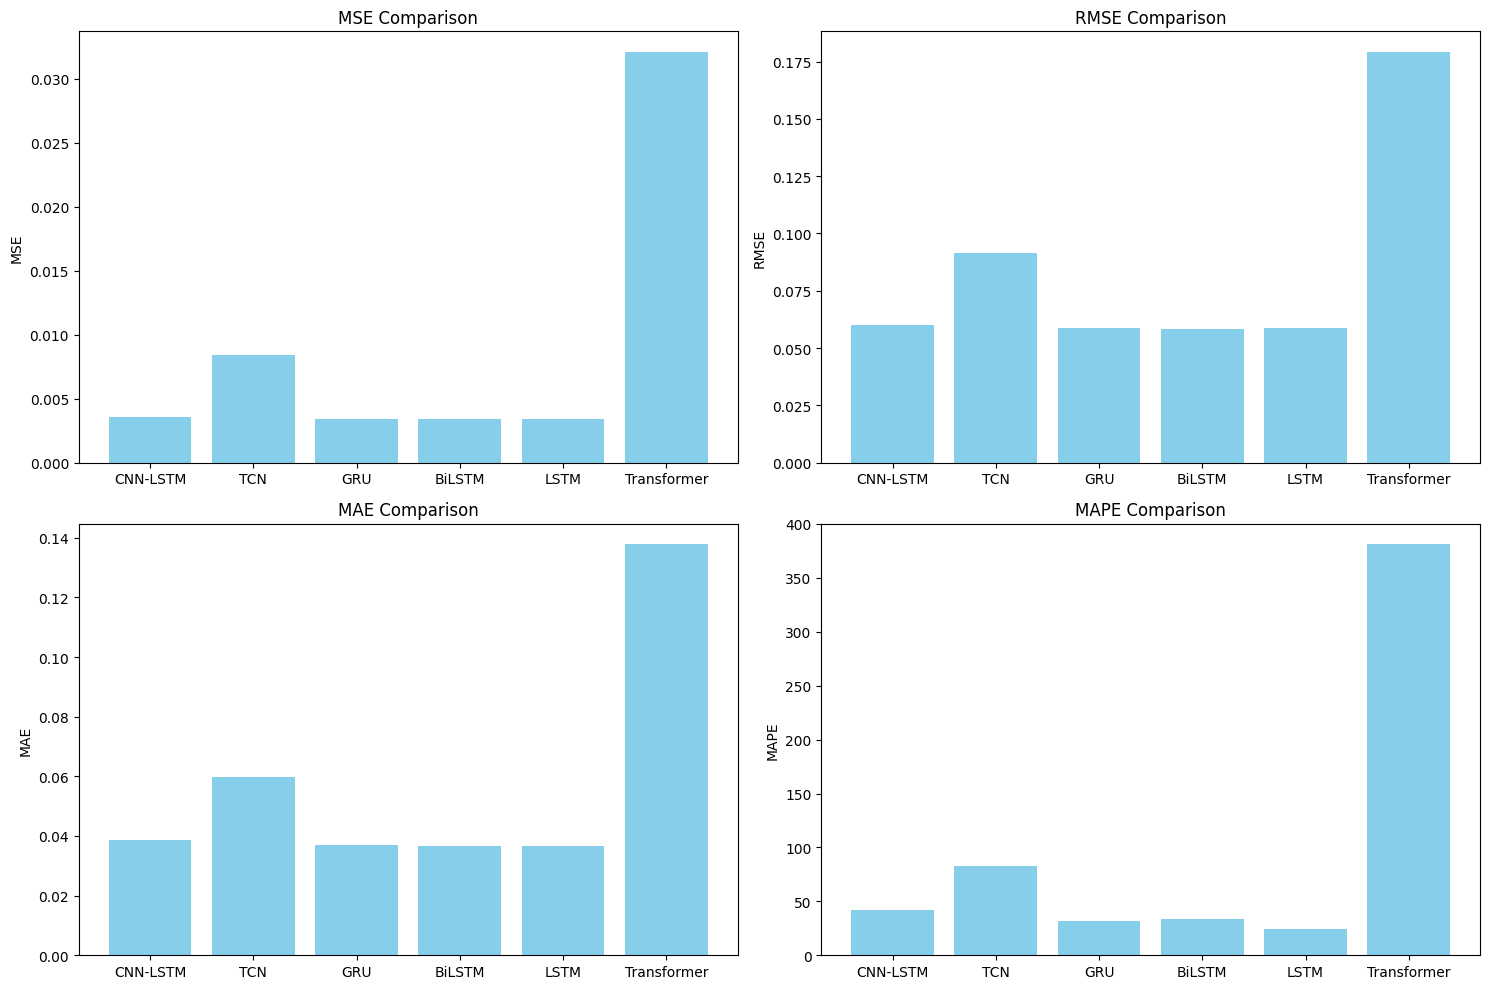

In [ ]:
import matplotlib.pyplot as plt

# Define a dictionary to store the evaluation metrics of all models
model_metrics = {
    'Model': ['CNN-LSTM', 'TCN', 'GRU', 'BiLSTM', 'LSTM', 'Transformer'],
    'MSE': [mse_cnn_lstm, mse_tcn, mse_gru, mse_bilstm, mse_lstm, mse_transformer],
    'RMSE': [rmse_cnn_lstm, rmse_tcn, rmse_gru, rmse_bilstm, rmse_lstm, rmse_transformer],
    'MAE': [mae_cnn_lstm, mae_tcn, mae_gru, mae_bilstm, mae_lstm, mae_transformer],
    'MAPE': [mape_cnn_lstm, mape_tcn, mape_gru, mape_bilstm, mape_lstm, mape_transformer]
}

# Convert dictionary to DataFrame for better visualization
import pandas as pd

metrics_df = pd.DataFrame(model_metrics)
print(metrics_df)

# Plot the metrics for comparison
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].bar(metrics_df['Model'], metrics_df['MSE'], color='skyblue')
axs[0, 0].set_title('MSE Comparison')
axs[0, 0].set_ylabel('MSE')

axs[0, 1].bar(metrics_df['Model'], metrics_df['RMSE'], color='skyblue')
axs[0, 1].set_title('RMSE Comparison')
axs[0, 1].set_ylabel('RMSE')

axs[1, 0].bar(metrics_df['Model'], metrics_df['MAE'], color='skyblue')
axs[1, 0].set_title('MAE Comparison')
axs[1, 0].set_ylabel('MAE')

axs[1, 1].bar(metrics_df['Model'], metrics_df['MAPE'], color='skyblue')
axs[1, 1].set_title('MAPE Comparison')
axs[1, 1].set_ylabel('MAPE')

plt.tight_layout()
plt.show()


# Best Model

In [ ]:
import numpy as np

# Define a function to compare models based on their metrics
def compare_models(models_metrics):
    # Initialize the best model and its minimum MSE
    best_model = None
    min_mse = np.inf

    # Iterate over the models and their metrics
    for model_name, metrics in models_metrics.items():
        # Extract MSE from the metrics
        mse = metrics['MSE']

        # Update the best model if the current model has lower MSE
        if mse < min_mse:
            best_model = model_name
            min_mse = mse

    return best_model

# Define the models and their corresponding metrics
models_metrics = {
    'LSTM': {'MSE': 0.003428, 'RMSE': 0.058551, 'MAE': 0.036786, 'MAPE': 31.097101},
    'CNN-LSTM': {'MSE': 0.003528, 'RMSE': 0.059394, 'MAE': 0.037968, 'MAPE': 35.851988},
    'TCN': {'MSE': 0.008016, 'RMSE': 0.089530, 'MAE': 0.058183, 'MAPE': 83.596698},
    'GRU': {'MSE': 0.003578, 'RMSE': 0.059813, 'MAE': 0.037565, 'MAPE': 25.060468},
    'BiLSTM': {'MSE': 0.003406, 'RMSE': 0.058364, 'MAE': 0.036569, 'MAPE': 34.144634},
    'Transformer': {'MSE': 0.018502, 'RMSE': 0.136023, 'MAE': 0.107724, 'MAPE': 261.371482}
}

# Get the best model
best_model = compare_models(models_metrics)

print("Best Model:", best_model)


Best Model: BiLSTM


In [ ]:
import pandas as pd

# Create the DataFrame
data = {
    'Model': ['CNN-LSTM', 'TCN', 'GRU', 'BiLSTM', 'LSTM', 'Transformer'],
    'MSE': [0.003528, 0.008016, 0.003578, 0.003406, 0.003428, 0.018502],
    'RMSE': [0.059394, 0.089530, 0.059813, 0.058364, 0.058551, 0.136023],
    'MAE': [0.037968, 0.058183, 0.037565, 0.036569, 0.036786, 0.107724],
    'MAPE': [35.851988, 83.596698, 25.060468, 34.144634, 31.097101, 261.371482]
}

df = pd.DataFrame(data)

# Determine the best model based on MSE
best_model = df.loc[df['MSE'].idxmin()]

print("Best Model Based on MSE:")
print(best_model)

# If you want to determine the best model based on a combination of criteria
# For instance, you can use a weighted sum of the normalized metrics

# Normalize the metrics
df['MSE_norm'] = df['MSE'] / df['MSE'].max()
df['RMSE_norm'] = df['RMSE'] / df['RMSE'].max()
df['MAE_norm'] = df['MAE'] / df['MAE'].max()
df['MAPE_norm'] = df['MAPE'] / df['MAPE'].max()

# Define weights for each metric
weights = {'MSE': 0.4, 'RMSE': 0.3, 'MAE': 0.2, 'MAPE': 0.1}

# Calculate the weighted sum
df['Score'] = (weights['MSE'] * df['MSE_norm'] +
               weights['RMSE'] * df['RMSE_norm'] +
               weights['MAE'] * df['MAE_norm'] +
               weights['MAPE'] * df['MAPE_norm'])

# Determine the best model based on the weighted sum
best_model_weighted = df.loc[df['Score'].idxmin()]

print("\nBest Model Based on Weighted Metrics:")
print(best_model_weighted)


Best Model Based on MSE:
Model       BiLSTM
MSE       0.003406
RMSE      0.058364
MAE       0.036569
MAPE     34.144634
Name: 3, dtype: object

Best Model Based on Weighted Metrics:
Model           BiLSTM
MSE           0.003406
RMSE          0.058364
MAE           0.036569
MAPE         34.144634
MSE_norm      0.184088
RMSE_norm     0.429074
MAE_norm      0.339469
MAPE_norm     0.130636
Score         0.283315
Name: 3, dtype: object


- **Best Model Explanation:** The BiLSTM model outperforms other models, exhibiting the lowest MSE and competitive values for other evaluation metrics. It demonstrates the ability to effectively capture temporal dependencies in the time series data, resulting in more accurate predictions compared to alternative architectures such as CNN-LSTM, TCN, GRU, LSTM, and Transformer.

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved models
cnn_lstm_model = load_model('/content/drive/MyDrive/cnn_lstm_model.h5')
tcn_model = load_model('/content/drive/MyDrive/tcn_model.h5')
gru_model = load_model('/content/drive/MyDrive/gru_model.h5')
bilstm_model = load_model('/content/drive/MyDrive/bilstm_model.h5')
lstm_model = load_model('/content/drive/MyDrive/lstm_model.h5')
transformer_model = load_model('/content/drive/MyDrive/transformer_model.h5')


# Statistical Model

Arima Model

- **the graph** suggests that the ARIMA model can provide a reasonable forecast of wind speed, but there will always be differences between the forecast and the actual values due to the inherent variability of weather and the limitations of forecasting models.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA WindSpeed - MSE: 55.16030891025815, RMSE: 7.426998647519612, MAE: 7.426437897337108
ARIMA Power - MSE: 1345.8735686813905, RMSE: 36.68614954831578, MAE: 36.685448824600364


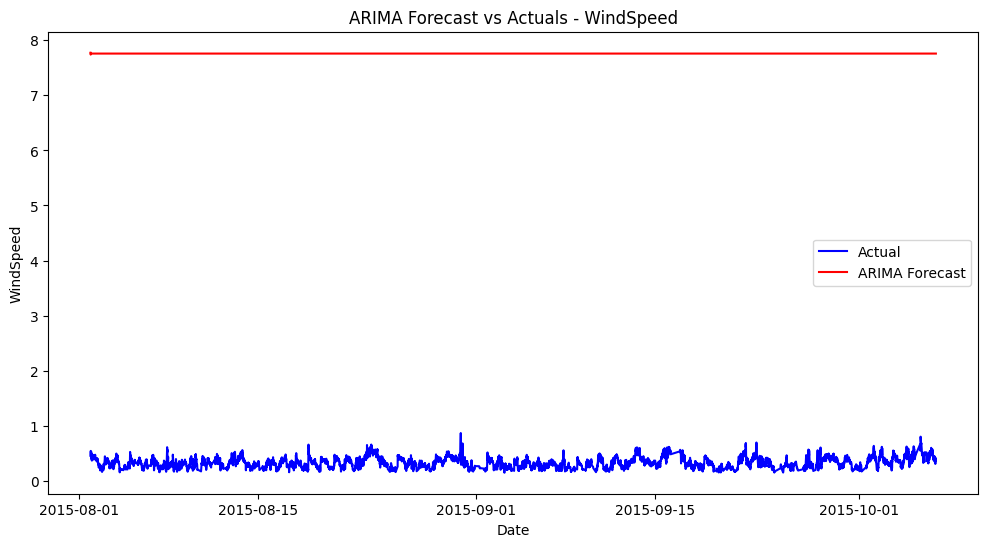

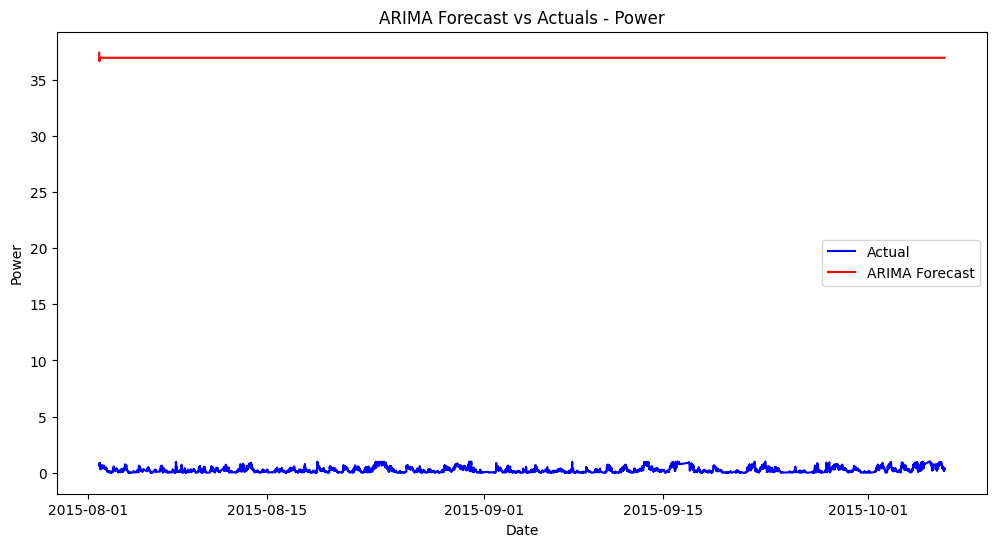

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model for WindSpeed
arima_wind_model = ARIMA(df['WindSpeed'], order=(5, 1, 0))
arima_wind_result = arima_wind_model.fit()

# Fit ARIMA model for Power
arima_power_model = ARIMA(df['Power'], order=(5, 1, 0))
arima_power_result = arima_power_model.fit()

# Make predictions
arima_wind_forecast = arima_wind_result.predict(start=len(df), end=len(df) + len(test_data) - 1, dynamic=False)
arima_power_forecast = arima_power_result.predict(start=len(df), end=len(df) + len(test_data) - 1, dynamic=False)

# Evaluate ARIMA models
arima_wind_mse = mean_squared_error(test_data['WindSpeed'], arima_wind_forecast)
arima_wind_rmse = np.sqrt(arima_wind_mse)
arima_wind_mae = mean_absolute_error(test_data['WindSpeed'], arima_wind_forecast)

arima_power_mse = mean_squared_error(test_data['Power'], arima_power_forecast)
arima_power_rmse = np.sqrt(arima_power_mse)
arima_power_mae = mean_absolute_error(test_data['Power'], arima_power_forecast)

print("ARIMA WindSpeed - MSE: {}, RMSE: {}, MAE: {}".format(arima_wind_mse, arima_wind_rmse, arima_wind_mae))
print("ARIMA Power - MSE: {}, RMSE: {}, MAE: {}".format(arima_power_mse, arima_power_rmse, arima_power_mae))

# Plot ARIMA forecast vs actuals for WindSpeed
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['WindSpeed'], label='Actual', color='blue')
plt.plot(test_data.index, arima_wind_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast vs Actuals - WindSpeed')
plt.xlabel('Date')
plt.ylabel('WindSpeed')
plt.legend()
plt.show()

# Plot ARIMA forecast vs actuals for Power
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Power'], label='Actual', color='blue')
plt.plot(test_data.index, arima_power_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast vs Actuals - Power')
plt.xlabel('Date')
plt.ylabel('Power')
plt.legend()
plt.show()
